In [0]:
import numpy as np
import matplotlib.pyplot as plt

# inner circle

In [0]:
x = np.random.rand(2000) * 2 - 1
y = np.random.rand(2000) * 2 - 1

In [3]:
f = np.sqrt(x ** 2 + y ** 2) < 0.4
f.sum()

263

In [0]:
ax = x[f]
ay = y[f]
alabel = np.zeros(f.sum())

# outer ring

In [0]:
x = np.random.rand(1000) * 2 - 1
y = np.random.rand(1000) * 2 - 1

In [6]:
f1 = np.sqrt(x ** 2 + y ** 2) > 0.7
f2 = np.sqrt(x ** 2 + y ** 2) < 0.9
f = f1 & f2
f.sum()

241

In [0]:
bx = x[f]
by = y[f]
blabel = np.ones(f.sum())

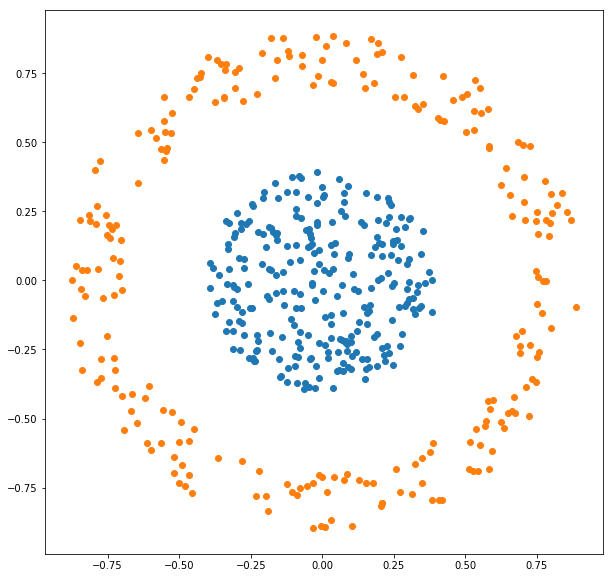

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(ax, ay)
plt.scatter(bx, by)

# combine

In [9]:
label = np.concatenate((alabel, blabel))
label.shape

(504,)

In [10]:
x = np.concatenate((ax, bx))
y = np.concatenate((ay, by))
x.shape

(504,)

In [11]:
(x[0], y[0])

(0.3025191142901946, -0.006936028956999296)

In [0]:
# you may write a feature engineering code here


In [12]:
X = np.stack((x, y), axis=-1)
X.shape

(504, 2)

In [13]:
f = np.random.rand(X.shape[0]) < 0.8
Xtrain = X[f]
Xtest = X[~f]
label_train = label[f]
label_test = label[~f]
print(Xtrain.shape)
print(Xtest.shape)

(419, 2)
(85, 2)


# learning

In [14]:
import keras
from keras.layers import *
import tensorflow as tf

Using TensorFlow backend.


In [15]:
model = keras.Sequential([
        Dense(4, activation='sigmoid', input_shape=(2,)),    
        Dense(1, activation='sigmoid'),    
]) 

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer=tf.train.RMSPropOptimizer(0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(Xtrain, label_train, epochs=30) # , shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
419/419 [==============================] - 0s 418us/step - loss: 0.7360 - acc: 0.4606
Epoch 2/30
419/419 [==============================] - 0s 46us/step - loss: 0.6969 - acc: 0.4773
Epoch 3/30
419/419 [==============================] - 0s 42us/step - loss: 0.6996 - acc: 0.5394
Epoch 4/30
419/419 [==============================] - 0s 41us/step - loss: 0.6932 - acc: 0.5704
Epoch 5/30
419/419 [==============================] - 0s 43us/step - loss: 0.6963 - acc: 0.5680
Epoch 6/30
419/419 [==============================] - 0s 49us/step - loss: 0.7059 - acc: 0.5036
Epoch 7/30
419/419 [==============================] - 0s 43us/step - loss: 0.7023 - acc: 0.5179
Epoch 8/30
419/419 [==============================] - 0s 41us/step - loss: 0.6911 - acc: 0.5847
Epoch 9/30
419/419 [==============================] - 0s 43us/step - loss: 0.6643 - acc: 0.5943
Epoch 10/30
419/419 [==============================] - 0s 47us/step - loss: 0.6161 - ac

In [18]:
test_loss, test_acc = model.evaluate(Xtest, label_test)  

print('Test accuracy:', test_acc)

85/85 [==============================] - 0s 357us/step
Test accuracy: 1.0


In [19]:
a = np.array([[0,0]])
model.predict(a)

array([[0.0001589]], dtype=float32)

In [20]:
a = np.array([[0.8,0]])
model.predict(a)

array([[0.996051]], dtype=float32)

# Save Model

In [0]:
with open('model.json', 'w') as json_file:
    json = model.to_json()
    json_file.write(json)
model.save_weights('model.h5')

In [22]:
from keras.models import model_from_json

with open('model.json', 'r') as json_file:
    json = json_file.read()
    model2 = model_from_json(json)
model2.load_weights("model.h5")

 
# compile and eval
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
test_loss, test_acc = model2.evaluate(Xtest, label_test)  

print('Test accuracy:', test_acc)

32/85 [==========>...................] - ETA: 0s

InvalidArgumentError: ignored